<a href="https://colab.research.google.com/github/Data-Bender-dev/Data-Analysis-Project/blob/main/City_Day_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-8eef589055ab>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(median_pm25, inplace=True)
<ipython-input-2-8eef589055ab>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

Null value counts after processing:
 City              0
Date              0
PM2.5             0
PM10              0
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene           0
Toluene           0
Xylene            0
AQI               0
AQI_Bucket        0
dtype: int64

Data types:
 City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

Descriptive statistics:
               PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  29531.000000  25949.000000  25946.000000  25346.000000   
mean      64.510857    109.659366     17.574730     28.560659     

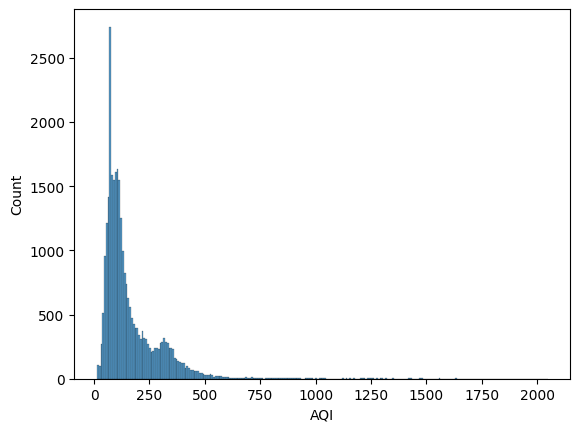

In [2]:
# prompt: remove the lines from this tab where we got errors

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("city_day.csv")

# Calculate the median of 'PM2.5' and 'PM10'
median_pm25 = df['PM2.5'].median()
median_pm10 = df['PM10'].median()

# Replace NaN values in 'PM2.5' and 'PM10' with their respective medians
df['PM2.5'].fillna(median_pm25, inplace=True)
df['PM10'].fillna(median_pm10, inplace=True)

# Interpolate 'AQI' using linear interpolation and fill remaining NaN with mean
df['AQI'].interpolate(method='linear', inplace=True)
mean_aqi = df['AQI'].mean()
df['AQI'].fillna(mean_aqi, inplace=True)

# Fill NaN values in 'AQI_Bucket' using backfill method
df['AQI_Bucket'].fillna(method='bfill', inplace=True)

# Interpolate 'Benzene', 'Toluene', and 'Xylene'
df['Benzene'].interpolate(method='linear', inplace=True)
df['Toluene'].interpolate(method='linear', inplace=True)
df['Xylene'].interpolate(method='linear', inplace=True)

# Check for and handle negative values (example for 'PM2.5', adapt for other columns)
df['PM2.5'] = df['PM2.5'].apply(lambda x: 0 if x < 0 else x)
df['PM10'] = df['PM10'].apply(lambda x: 0 if x < 0 else x)

# Check the quality of the processed data
null_counts = df.isnull().sum()
print("Null value counts after processing:\n", null_counts)


# Additional quality checks (optional):
# 1. Data type validation:
print("\nData types:\n", df.dtypes)

# 2. Statistical summary:
print("\nDescriptive statistics:\n", df.describe())

# 3. Check for duplicates:
print("\nNumber of duplicate rows:", df.duplicated().sum())

# 4. Check the unique values in categorical columns:
print("\nUnique values in 'City':", df['City'].unique())
print("\nUnique values in 'AQI_Bucket':", df['AQI_Bucket'].unique())

# Save the processed data to a new CSV file
df.to_csv('processed_city_day.csv', index=False)

df = pd.read_csv('processed_city_day.csv')

# Display some info of processed data
print(df.duplicated().sum())
print(df.dtypes)

# Visualize AQI distribution
sns.histplot(df['AQI'])
plt.show()
